In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Content.csv")

In [4]:
df.head()

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [7]:
#if 'Unnamed: 0' in df.columns:
    #df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df1 = pd.read_csv("Reactions.csv")

In [9]:
df1.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,photo,Studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,photo,Studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25,photo,Studying,positive,30


In [11]:
if 'Unnamed: 0' in df1.columns:
    df1.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df1.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25,photo,Studying,positive,30


In [14]:
df1.columns

Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category',
       'Sentiment', 'Score'],
      dtype='object')

In [16]:
df1.rename(columns= {"Type":"Reaction Type"}, inplace = True)

In [17]:
df1.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25,photo,Studying,positive,30


In [18]:
df1.dropna(subset=['Reaction Type'], inplace=True)

In [19]:
df2 = pd.read_csv("ReactionTypes.csv")

In [20]:
df2.head()

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [21]:
if 'Unnamed: 0' in df2.columns:
    df2.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
df2.rename(columns= {"Type":"Reaction Type"}, inplace = True)

In [23]:
df2.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [24]:
merged_df = pd.merge(df1, df, on='Content ID', how='inner')

In [25]:
merged_data_df = pd.merge(merged_df, df2, on='Reaction Type', how='inner')

In [26]:
merged_data_df.columns

Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type_x',
       'Category_x', 'Sentiment_x', 'Score_x', 'Content Type_y', 'Category_y',
       'Sentiment_y', 'Score_y'],
      dtype='object')

In [83]:
merged_data_df['Category'] = merged_data_df['Category'].str.replace('"', '')

In [84]:
merged_data_df['Category'] = merged_data_df['Category'].str.capitalize()

In [85]:
# Group by 'Category' and calculate the sum of 'Score'
category_scores = merged_data_df.groupby('Category')['Score'].sum()

In [86]:
category_scores

Category
Animals            74965
Cooking            64756
Culture            66579
Dogs               52511
Education          57436
Fitness            55323
Food               66676
Healthy eating     69339
Public speaking    49264
Science            71168
Soccer             57783
Studying           54269
Technology         68738
Tennis             50339
Travel             64880
Veganism           49619
Name: Score, dtype: int64

In [89]:
top_categories = category_scores.nlargest(5)

In [90]:
top_categories

Category
Animals           74965
Science           71168
Healthy eating    69339
Technology        68738
Food              66676
Name: Score, dtype: int64

In [94]:
category_scores = pd.Series({'Animals': 74965, 'Science': 71168, 'Healthy eating': 69339, 'Technology': 68738, 'Food': 66676})

In [92]:
category_scores

Animals           74965
Science           71168
Healthy eating    69339
Technology        68738
Food              66676
dtype: int64

In [95]:
# Convert the Series to a DataFrame
popular_categories = pd.DataFrame({'Category': category_scores.index, 'Aggregate Score': category_scores.values})
#popular_categories['Aggregate Score'] =popular_categories['Aggregate Score']

In [96]:
popular_categories

,Category,Aggregate Score
0,Animals,74965
1,Science,71168
2,Healthy eating,69339
3,Technology,68738
4,Food,66676


In [98]:
import matplotlib.pyplot as plt

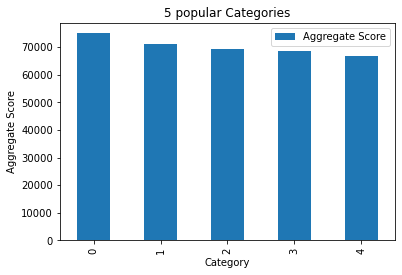

In [99]:
popular_categories.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Aggregate Score")
plt.title("5 popular Categories")
plt.show()